In [2]:
from analytics import Swaption, BlackSwaption, Index, VolatilitySurface, Portfolio
from analytics.scenarios import run_swaption_scenarios, run_index_scenarios, run_portfolio_scenarios
import datetime

import exploration.swaption_calendar_spread as spread
#import swaption_calendar_spread as spread

In [3]:
#Delta Chart: Red = Long Risk, Blue = Short Risk

<IPython.core.display.Javascript object>


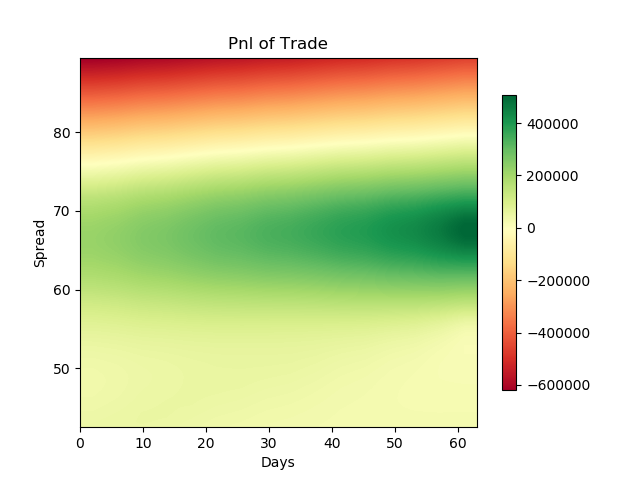

<IPython.core.display.Javascript object>


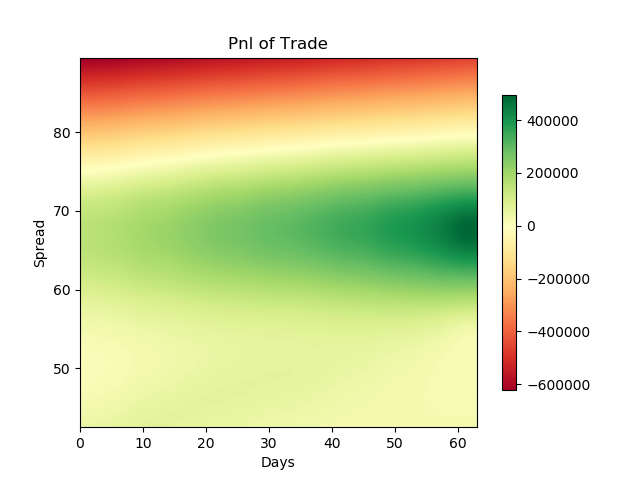

<IPython.core.display.Javascript object>


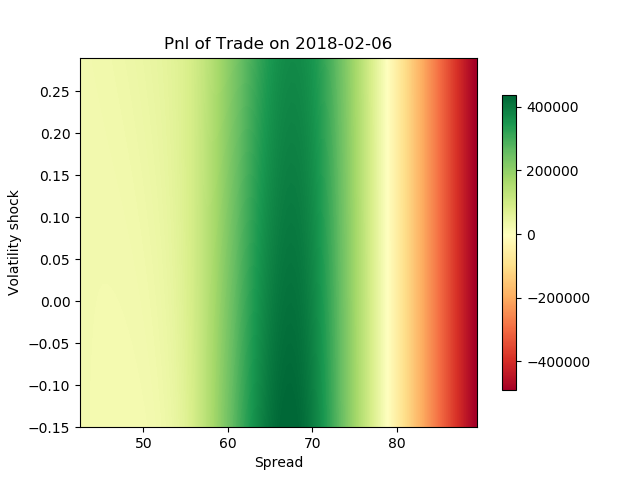

In [91]:
#Ad hoc
option_delta = Index.from_name('IG', 29, '5yr')
option_delta.spread = 50
option1 = BlackSwaption(option_delta, datetime.date(2018, 2, 21), 55, option_type="payer")
option2 = BlackSwaption(option_delta, datetime.date(2018, 2, 21), 67.5, option_type="payer")
option3 = BlackSwaption(option_delta, datetime.date(2018, 2, 21), 80, option_type="payer")
option1.sigma = .38
option2.sigma = .61
option3.sigma = .69
option1.notional = 100_000_000
option2.notional = 200_000_000
option3.notional = 1
option1.direction = 'Long'
option2.direction = 'Short'
option3.direction = 'Long'
#option_delta.notional = 1
option_delta.notional = option1.notional * option1.delta + option2.notional * option2.delta + option3.notional * option3.delta
option_delta.direction = 'Seller' if option_delta.notional > 0 else 'Buyer'
option_delta.notional = abs(option_delta.notional)
portf = Portfolio([option1, option2, option3, option_delta])
#Plot Scenarios Inputs: Portfolio, spread shock tightening%, spread shock widening%, snapshot period)
df = spread.plot_trade_scenarios(portf, -.15, .8, -4, vol_time_roll=False)

In [92]:
portf

Portfolio 2017-12-18

Product     Index       Notional   Ref Strike Direction      Expiry    Vol          PV   Delta  \
Swaption  IG29 5yr 100,000,000.00 50.00     55      Long  2018-02-21 38.00%   95,836.17  41.41%   
Swaption  IG29 5yr 200,000,000.00 50.00   67.5     Short  2018-02-21 61.00% -109,835.19 -19.37%   
Swaption  IG29 5yr           1.00 50.00     80      Long  2018-02-21 69.00%        0.00   9.41%   
   Index  IG29 5yr   2,671,159.95 50.00    N/A    Seller         N/A    N/A   69,548.44 100.00%   

 Gamma     Theta      Vega  
45.80% -1,117.14  3,829.31  
-20.88%  2,487.79 -5,367.41  
11.39%     -0.00      0.00  
 0.00%     41.02      0.00

In [101]:
portf.trade_date = datetime.date(2018,2,1)
portf.ref = 52
#portf.swaptions[0].sigma = .25
#portf.swaptions[1].sigma = .31
#portf.swaptions[2].sigma = .46
portf.swaptions[0].sigma = .38
portf.swaptions[1].sigma = .61
#portf.swaptions[2].sigma = .69
portf

Portfolio 2018-02-01

Product     Index       Notional   Ref Strike Direction      Expiry    Vol         PV   Delta  \
Swaption  IG29 5yr 100,000,000.00 52.00     55      Long  2018-02-21 38.00%  42,176.72  35.74%   
Swaption  IG29 5yr 200,000,000.00 52.00   67.5     Short  2018-02-21 61.00% -12,351.93  -5.24%   
Swaption  IG29 5yr           1.00 52.00     80      Long  2018-02-21 46.00%       0.00   0.01%   
   Index  IG29 5yr   2,671,159.95 52.00    N/A    Seller         N/A    N/A  62,152.51 100.00%   

 Gamma     Theta      Vega  
68.09% -1,901.54  2,014.90  
-15.28%  1,591.11 -1,112.36  
 0.18%     -0.00      0.00  
 0.00%     32.75      0.00

In [79]:
df.spread = df.spread.round(2)
df1= df.set_index('spread', append=True)
df1.xs(('2018-01-16', '66.0'))

Portfolio 2018-01-16

Product     Index       Notional   Ref Strike Direction      Expiry    Vol          PV   Delta  \
Swaption  IG29 5yr 100,000,000.00 66.00     55      Long  2018-02-21 25.00%  570,031.76  99.70%   
Swaption  IG29 5yr 200,000,000.00 66.00   67.5     Short  2018-02-21 31.00% -233,853.59 -54.47%   
Swaption  IG29 5yr 100,000,000.00 66.00     80      Long  2018-02-21 46.00%   27,654.16  14.31%   
   Index  IG29 5yr  14,735,263.02 66.00    N/A    Seller         N/A    N/A  242,206.53 100.00%   

 Gamma     Theta      Vega  
 3.98%    -35.39    122.60  
-56.34%  3,288.26 -7,636.47  
23.29% -1,300.06  2,085.89  
 0.00%    306.39      0.00

In [ ]:
#Dec Jan 2017 Trade
option_delta = Index.from_tradeid(864)
option1 = BlackSwaption.from_tradeid(3, option_delta)
option2 = BlackSwaption.from_tradeid(4, option_delta)
portf = Portfolio([option1, option2, option_delta])
spread.plot_trade_scenarios(portf)

In [ ]:
#Feb 2017: Sell May Buy April Calendar Trade
option_delta = Index.from_tradeid(870)
option1 = BlackSwaption.from_tradeid(5, option_delta)
option2 = BlackSwaption.from_tradeid(6, option_delta)
portf = Portfolio([option1, option2, option_delta])
spread.plot_trade_scenarios(portf)

In [ ]:
#April 2017: Sell May Buy June Calendar Trade
option_delta = Index.from_tradeid(874)
option1 = BlackSwaption.from_tradeid(7, option_delta)
option2 = BlackSwaption.from_tradeid(8, option_delta)
portf = Portfolio([option1, option2, option_delta])
spread.plot_trade_scenarios(portf)

In [ ]:
#June July 2017 Calendar Trade
option_delta_pf = Index.from_tradeid(874)
option_delta2_pf = Index.from_tradeid(879)

option1_pf = BlackSwaption.from_tradeid(7, option_delta_pf)
option2_pf = BlackSwaption.from_tradeid(9, option_delta_pf)
option_delta_pf.notional = 50_335_169

portf = Portfolio([option1_pf, option2_pf, option_delta_pf])
portf.trade_date = datetime.date(2017, 5, 17)
portf.mark()
spread.plot_trade_scenarios(portf)

In [ ]:
#July 2017: Buy Sept HY payer spread
option_delta = Index.from_tradeid(891)
option1 = BlackSwaption.from_tradeid(10, option_delta)
option2 = BlackSwaption.from_tradeid(11, option_delta)
portf = Portfolio([option1, option2, option_delta])
spread.plot_trade_scenarios(portf)

<IPython.core.display.Javascript object>


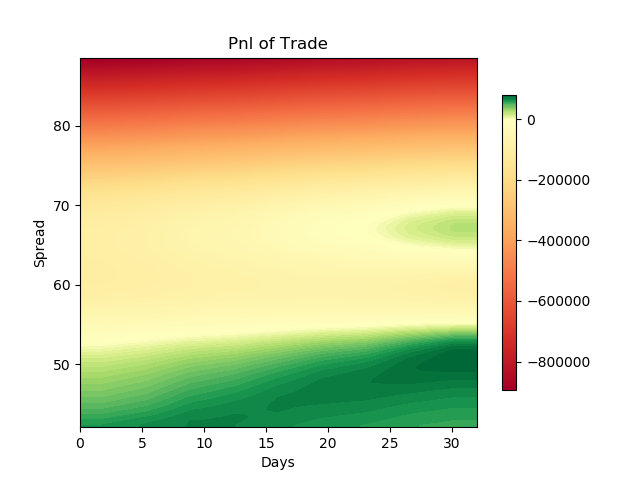

<IPython.core.display.Javascript object>


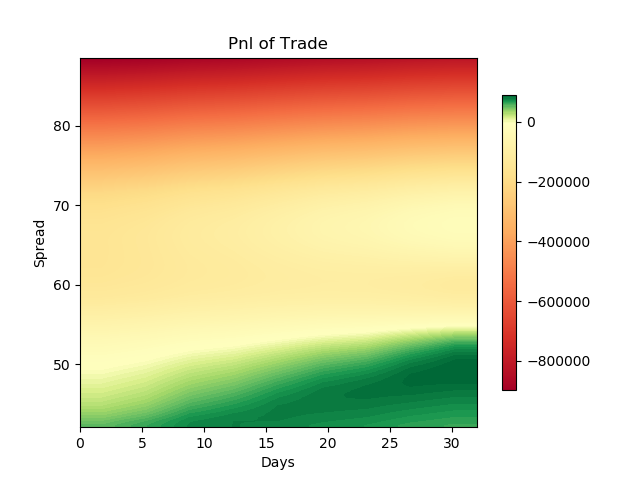

<IPython.core.display.Javascript object>


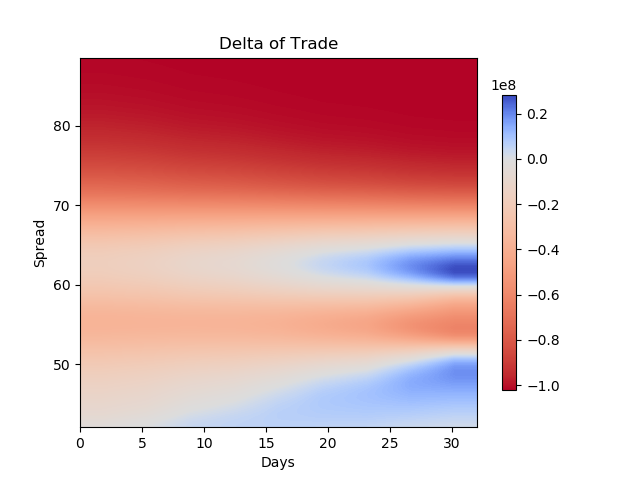

<IPython.core.display.Javascript object>


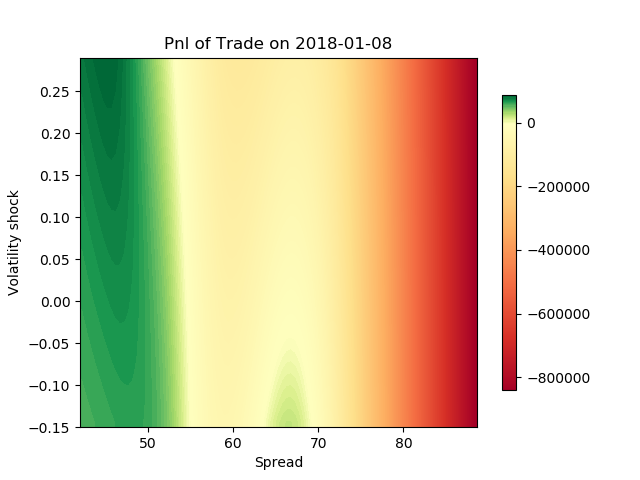

In [84]:
#Ad hoc
option_delta = Index.from_name('IG', 29, '5yr')
option_delta.spread = 49.5
option1 = BlackSwaption(option_delta, datetime.date(2018, 2, 21), 55, option_type="payer")
option2 = BlackSwaption(option_delta, datetime.date(2018, 2, 21), 67.5, option_type="payer")
option3 = BlackSwaption(option_delta, datetime.date(2018, 1, 21), 52.5, option_type="payer")
option4 = BlackSwaption(option_delta, datetime.date(2018, 1, 21), 60, option_type="payer")
option1.sigma = .38
option2.sigma = .61
option3.sigma = .371
option4.sigma = .581
option1.notional = 100_000_000
option2.notional = 200_000_000
option3.notional = 100_000_000
option4.notional = 100_000_000
option1.direction = 'Long'
option2.direction = 'Short'
option3.direction = 'Short'
option4.direction = 'Long'
#option_delta.notional = 1
option_delta.notional = option1.notional * option1.delta + option2.notional * option2.delta 
option_delta.direction = 'Seller' if option_delta.notional > 0 else 'Buyer'
option_delta.notional = abs(option_delta.notional)
portf = Portfolio([option1, option2, option3, option4, option_delta])
#Plot Scenarios Inputs: Portfolio, spread shock tightening%, spread shock widening%, snapshot period)
df = spread.plot_trade_scenarios(portf, -.15, .8, -4, vol_time_roll=False)

In [85]:
portf

Portfolio 2017-12-18

Product     Index       Notional   Ref Strike Direction      Expiry    Vol          PV   Delta  \
Swaption  IG29 5yr 100,000,000.00 49.50     55      Long  2018-02-21 38.00%   86,764.11  38.97%   
Swaption  IG29 5yr 200,000,000.00 49.50   67.5     Short  2018-02-21 61.00% -101,282.59 -18.32%   
Swaption  IG29 5yr 100,000,000.00 49.50   52.5     Short  2018-01-21 37.10%  -67,574.92 -42.02%   
Swaption  IG29 5yr 100,000,000.00 49.50     60      Long  2018-01-21 58.10%   39,028.47  20.03%   
   Index  IG29 5yr   2,338,034.31 49.50    N/A    Seller         N/A    N/A   61,436.64 100.00%   

 Gamma     Theta      Vega  
45.49% -1,084.69  3,721.12  
-20.38%  2,375.57 -5,130.32  
-61.67%  1,489.81 -2,736.96  
30.80% -1,623.74  1,929.39  
 0.00%     35.60      0.00

In [86]:
portf.pv

18371.70515613936

In [90]:
portf.trade_date = datetime.date(2018,1,16)
portf.ref = 47
portf.pnl

49331.119620099111